In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df1=pd.read_excel('Phase1_dataset.xlsx',sheet_name='Leather Safety Gloves')
df2=pd.read_excel('Phase1_dataset.xlsx',sheet_name='Ladies Kurta')
df3=pd.read_excel('Phase1_dataset.xlsx',sheet_name='Impact Drill')

In [2]:
xlsx=pd.ExcelFile('Phase1_dataset.xlsx')

In [4]:
xlsx.sheet_names

['Leather Safety Gloves', 'Ladies Kurta', 'Impact Drill']

In [6]:
df1.head()

,Category Name,Unit,Price
0,Leather Safety Gloves,Pair,10
1,Leather Safety Gloves,Pair,12
2,Leather Safety Gloves,Pair,12
3,Leather Safety Gloves,Pair,20
4,Leather Safety Gloves,Pair,23


In [5]:
df1.shape

(144, 3)

In [7]:
df1['Category Name'].unique()

array(['Leather Safety Gloves'], dtype=object)

In [9]:
df3['Unit'].unique()

array(['Piece', 'Piece(s)', 'pack', 'unit', 'Number', 'Unit', 'Pack',
       '1nos', 'Unit(s)', 'kit', 'Set', 'Pc_Onwards', 'ONWARDS', 'Kit'],
      dtype=object)

In [10]:
df1['Unit']=df1.Unit.apply(lambda x:x.upper())

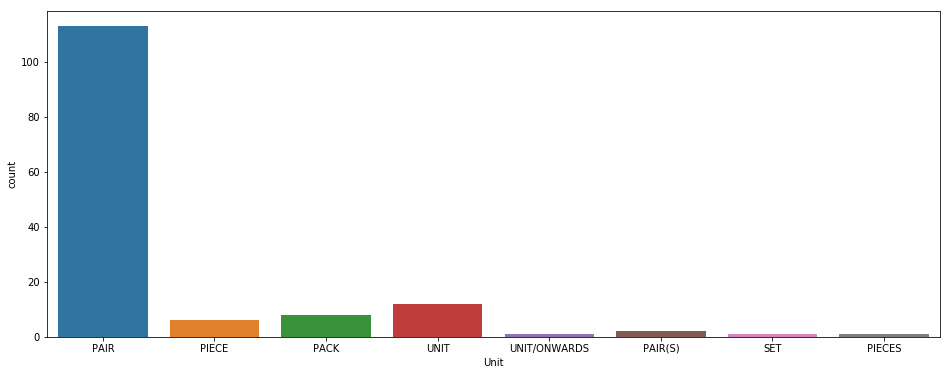

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Unit',data=df1)

In [55]:
d=df1[df1['Unit']=='PAIR']

In [61]:
data_mean=np.mean(d['Price'])

In [62]:
data_std=np.std(d['Price'])

In [63]:
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [64]:
# identify outliers
outliers = [x for x in d['Price'] if x < lower or x > upper]

In [65]:
# remove outliers
outliers_removed = [x for x in d['Price'] if x > lower and x < upper]

In [67]:
outliers_removed

[10,
 12,
 12,
 20,
 23,
 25,
 25,
 25,
 29,
 30,
 31,
 32,
 35,
 35,
 38,
 38,
 38,
 40,
 40,
 40,
 40,
 40,
 45,
 45,
 45,
 45,
 45,
 45,
 50,
 50,
 50,
 50,
 50,
 52,
 52,
 55,
 60,
 60,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 67,
 68,
 70,
 70,
 70,
 70,
 75,
 75,
 75,
 75,
 80,
 80,
 80,
 80,
 80,
 80,
 85,
 85,
 90,
 90,
 90,
 95,
 96,
 100,
 100,
 100,
 110,
 110,
 110,
 120,
 120,
 125,
 125,
 130,
 135,
 145,
 150,
 155,
 170,
 170,
 175,
 175,
 175,
 175,
 175,
 177,
 180,
 180,
 180,
 180,
 180,
 180,
 180,
 180,
 180,
 190,
 195,
 199,
 200,
 200,
 200,
 230,
 240,
 250,
 250,
 250,
 250]

In [47]:
df1_res=df1.groupby('Unit')['Price'].unique().reset_index(name='price_range')

In [45]:
def price_range(df,unit):
    r=df[df['Unit']==unit].price_range[0]
    pmin=r.min()
    pmax=r.max()
    return pmin,pmax

In [52]:
unit='PACK'
pmin,pmax=price_range(df1_res,unit)
category='Leather Safety Gloves'
print("The price of",category,"per",unit,"ranges from Rs",pmin ,"to Rs", pmax,".")

The price of Leather Safety Gloves per PACK ranges from Rs 51 to Rs 18974 .


In [31]:
df1[df1['Unit']=='Pair'].max()

Category Name    Leather Safety Gloves
Unit                              Pair
Price                              350
dtype: object

In [53]:
df3.describe()

,Price
count,247.000000
mean,6570.153846
std,9543.845737
min,2.000000
25%,2107.500000
50%,3098.000000
75%,6020.000000
max,55000.000000
